In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [7]:
from pyndamics3 import Simulation
from pyndamics3.fit import fit, Parameter

In [30]:
t_data=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h_data=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

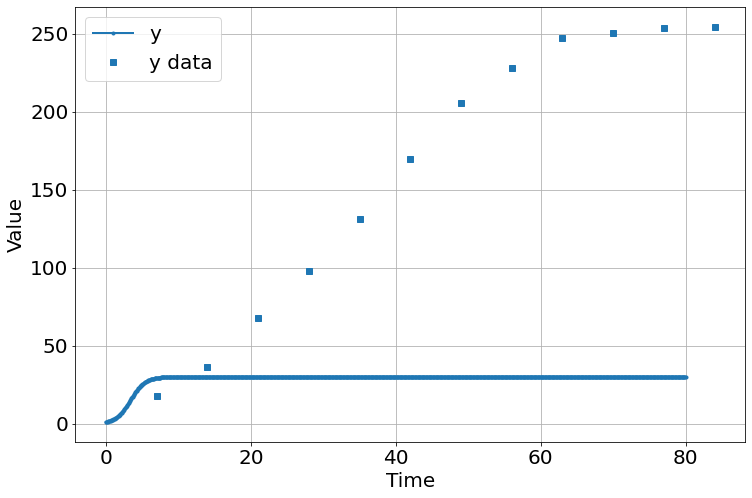

<Figure size 864x576 with 0 Axes>

In [31]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1,plot=True)
sim.params(a=1,k=30)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.run(80)

In [32]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
#           Parameter("initial_y",value=1,min=0,max=20),
           Parameter("k",value=30,min=0),
           )
results

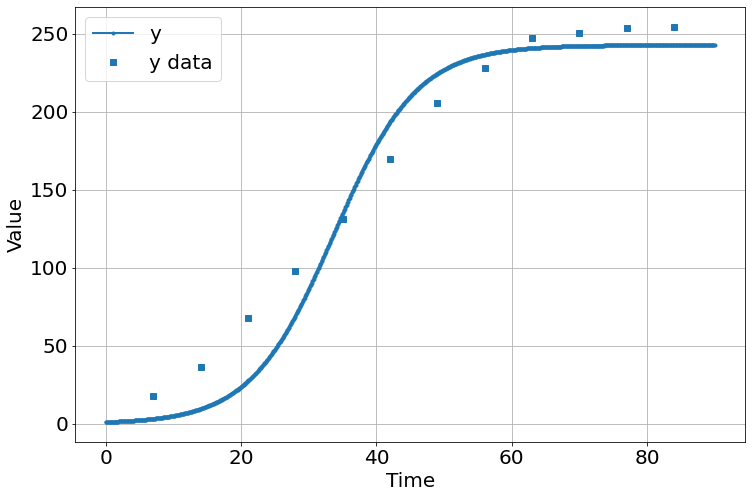

<Figure size 864x576 with 0 Axes>

In [33]:
sim.run(90)

In [34]:
results

In [36]:
aa=results.params['a']

In [ ]:
aa.

In [24]:
aa.stderr

0.007445560003090965

In [25]:
a=results.params['a'].value
k=results.params['k'].value

# 2-sigma uncertainties
a_plus=results.params['a'].value+2*results.params['a'].stderr
k_plus=results.params['k'].value+2*results.params['k'].stderr

a_minus=results.params['a'].value-2*results.params['a'].stderr
k_minus=results.params['k'].value-2*results.params['k'].stderr



In [26]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1)
sim.params(a=a,k=k)
sim.add_data(t=t_data,y=h_data)
sim.run(90)

t1=sim.t
y1=sim.y

sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1)
sim.params(a=a_plus,k=k_plus)
sim.add_data(t=t_data,y=h_data)
sim.run(90)

t2=sim.t
y2=sim.y

sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1)
sim.params(a=a_minus,k=k_minus)
sim.add_data(t=t_data,y=h_data)
sim.run(90)

t3=sim.t
y3=sim.y

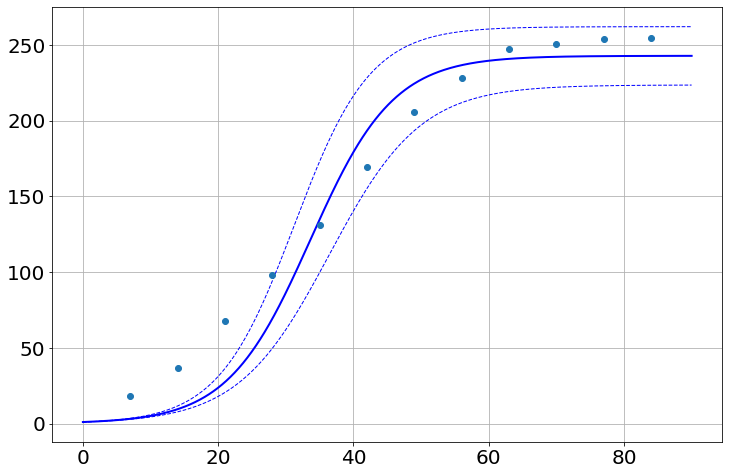

In [29]:
plot(t1,y1,'b-')
plot(t2,y2,'b--',lw=1)
plot(t3,y3,'b--',lw=1)
plot(t_data,h_data,'o')

## include initial y 

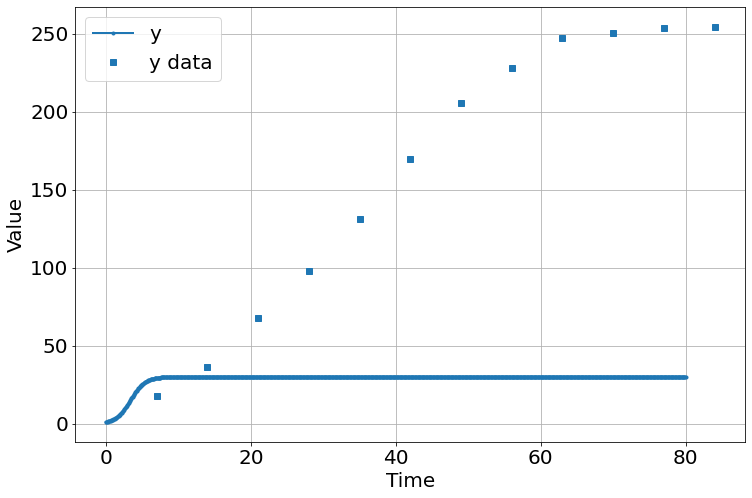

<Figure size 864x576 with 0 Axes>

In [41]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1,plot=True)
sim.params(a=1,k=30)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.run(80)

In [42]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0,max=20),
           Parameter("k",value=30,min=0),
           )
results

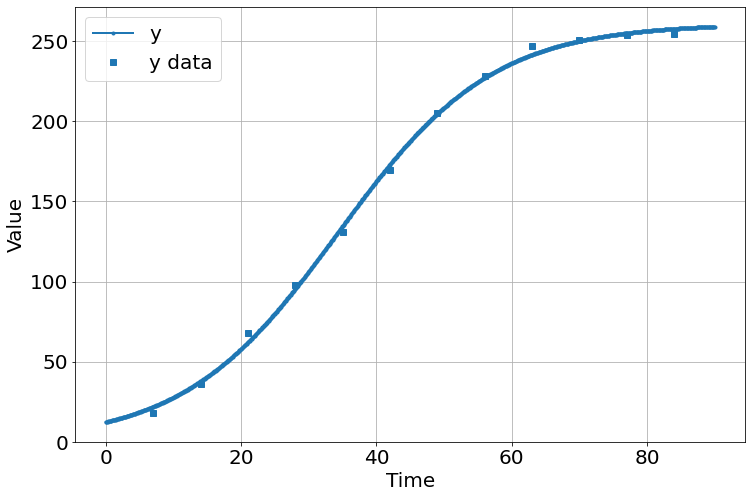

<Figure size 864x576 with 0 Axes>

In [44]:
sim.run(90)

In [46]:
a=results.params['a'].value
k=results.params['k'].value
initial_y=results.params['initial_y'].value

# 2-sigma uncertainties
a_plus=results.params['a'].value+2*results.params['a'].stderr
k_plus=results.params['k'].value+2*results.params['k'].stderr
initial_y_plus=results.params['initial_y'].value+2*results.params['initial_y'].stderr

a_minus=results.params['a'].value-2*results.params['a'].stderr
k_minus=results.params['k'].value-2*results.params['k'].stderr
initial_y_minus=results.params['initial_y'].value-2*results.params['initial_y'].stderr



In [47]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",initial_y)
sim.params(a=a,k=k)
sim.add_data(t=t_data,y=h_data)
sim.run(90)

t1=sim.t
y1=sim.y

sim=Simulation()
sim.add("y' = a*y*(1-y/k)",initial_y_plus)
sim.params(a=a_plus,k=k_plus)
sim.add_data(t=t_data,y=h_data)
sim.run(90)

t2=sim.t
y2=sim.y

sim=Simulation()
sim.add("y' = a*y*(1-y/k)",initial_y_minus)
sim.params(a=a_minus,k=k_minus)
sim.add_data(t=t_data,y=h_data)
sim.run(90)

t3=sim.t
y3=sim.y

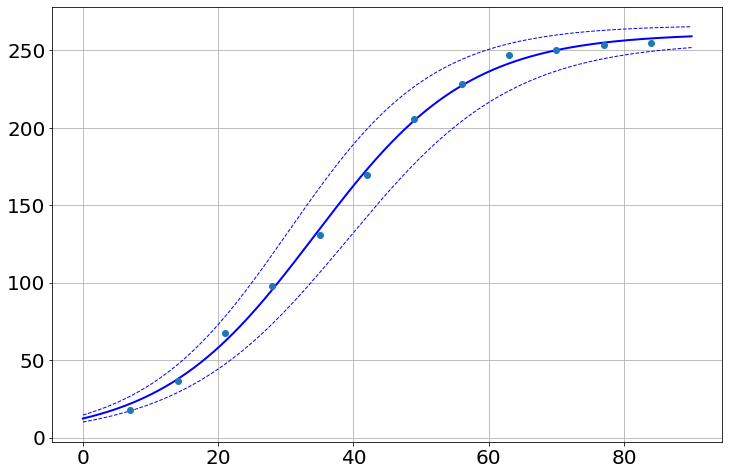

In [48]:
plot(t1,y1,'b-')
plot(t2,y2,'b--',lw=1)
plot(t3,y3,'b--',lw=1)
plot(t_data,h_data,'o')